
# Lab 6: Linear Regression

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing the dataset

In [10]:
train_df = pd.read_csv('trrain.csv')
test_df = pd.read_csv('test.csv')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


## Taking care of missing data

In [13]:
train_df.dropna(inplace=True)
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


## Visualizing training data

<AxesSubplot:xlabel='x', ylabel='y'>

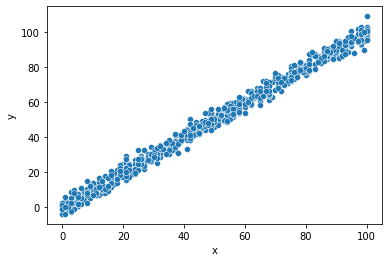

In [14]:
sns.scatterplot(data=train_df, x="x", y="y")

## Splitting rhe dataset

In [15]:
X_train = train_df.iloc[:, 0].values.reshape(-1, 1)
Y_train = train_df.iloc[:, 1].values.reshape(-1, 1)

x_test = test_df.iloc[:, 0].values.reshape(-1, 1)
y_test = test_df.iloc[:, 1].values.reshape(-1, 1)

## Training the Simple Linear Regression model

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

## Predicting the Test set results

In [17]:
y_pred = regressor.predict(x_test)

## Testing

In [18]:
r2_score(y_test, y_pred)

0.9888014444327563

## Visualising the Test set results

In [19]:
test_set_result = np.concatenate((x_test, y_test, y_pred), axis = 1)
test_set_result_df = pd.DataFrame(test_set_result, columns = ['x','y','y_pred'])
test_set_result_df

,x,y,y_pred
0,77.0,79.775152,76.943276
1,21.0,23.177279,20.906519
2,22.0,25.609262,21.907175
3,20.0,17.857388,19.905862
4,36.0,41.849864,35.916364
...,...,...,...
295,71.0,68.545888,70.939338
296,46.0,47.334876,45.922928
297,55.0,54.090637,54.928836
298,62.0,63.297171,61.933430


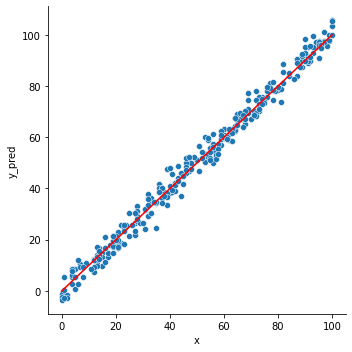

In [20]:
warnings.filterwarnings('ignore')

ax = sns.relplot(kind='scatter', x='x', y='y', data=test_set_result_df)
ax.map_dataframe(sns.lineplot, 'x', 'y_pred', color='r')